In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from scipy import stats

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
df = pd.read_csv(r'C:\Users\Shakil\Downloads\Compressed\shopping_behavior_updated.csv')
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [4]:
# check null value
df.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [5]:
# check duplicate value

df.duplicated().sum()

0

# Level 1

* 1. Find Mean, Median, and Mode (Age)
* 2. Find variance, standard deviation, and z-score (Purchase Amount (USD))
* 3. What are the top 5 items purchased by customers?
* 4. Most common payment method by consumers?
* 5. Average review score given by consumers?
* 6. Which shipping type is favorite by consumers based on Average Purchase Amount?
* 7. Find total amount of each Frequency of Purchases.
* 8. Total number of unique customers?

In [6]:
# 1. Find Mean, Median, and Mode (Age)

print('Average Age:', st.mean(df['Age']))
print('Median of Age:', st.median(df['Age']))
print('Mode of Age:', st.mode(df['Age']))

Average Age: 44.06846153846154
Median of Age: 44.0
Mode of Age: 69


In [7]:
# 2. Find variance, standard deviation, and z-score (Purchase Amount (USD))

print('Variance of Purchased Amount:', st.variance(df['Purchase Amount (USD)']))
print('Standard Deviation of Purchased Amount:', st.stdev(df['Purchase Amount (USD)']))

Variance of Purchased Amount: 560.9978060778241
Standard Deviation of Purchased Amount: 23.685392250875307


In [8]:
print('Z-Score of Purchased Amount:', stats.zscore(df['Purchase Amount (USD)']))

Z-Score of Purchased Amount: 0      -0.285629
1       0.178852
2       0.558882
3       1.276716
4      -0.454531
          ...   
3895   -1.341267
3896   -0.454531
3897   -1.130139
3898    0.727784
3899    0.896686
Name: Purchase Amount (USD), Length: 3900, dtype: float64


In [9]:
# 3. What are the top 5 items purchased by customers?

total_amount_of_item = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum()
total_amount_of_item.sort_values(ascending=False).head(5)

Item Purchased
Blouse     10410
Shirt      10332
Dress      10320
Pants      10090
Jewelry    10010
Name: Purchase Amount (USD), dtype: int64

In [10]:
# 4. Most common payment method by consumers?

payment_counts = df['Payment Method'].value_counts()
most_common_payment_method = payment_counts.idxmax()
count = payment_counts.max()

# Display in the required format
print(f"'{most_common_payment_method}' - {count}")

'PayPal' - 677


In [11]:
# 5. Average review score given by consumers?

average_review_score = df['Review Rating'].mean()
print(f"The average review score is: {average_review_score:.2f}")

The average review score is: 3.75


In [12]:
# 6. Which shipping type is favorite by consumers based on Average Purchase Amount?

favorite_shipping_type = df.groupby('Shipping Type')['Purchase Amount (USD)'].mean()
print('Favorite Shipping Type of Consumers:', favorite_shipping_type.head(1))

Favorite Shipping Type of Consumers: Shipping Type
2-Day Shipping    60.733652
Name: Purchase Amount (USD), dtype: float64


In [13]:
# 7. Find total amount of each Frequency of Purchases.

print('Total Amount of Frequency of Purchases:')
df.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum()

Total Amount of Frequency of Purchases:


Frequency of Purchases
Annually          34419
Bi-Weekly         33200
Every 3 Months    35088
Fortnightly       32007
Monthly           32810
Quarterly         33771
Weekly            31786
Name: Purchase Amount (USD), dtype: int64

In [14]:
# 8. Total number of unique customers?

print('Total unique customers:', df['Customer ID'].nunique())

Total unique customers: 3900


# Level 2

* 1. Correlation between 'Purchase Amount (USD)'
* 2. Calculate how many customers gave a 4 or 5 rating
* 3. Make a plot of top 5 Location based on Purchase Amount
* 4. Make a plot of top 5 Location based on Average Purchase Amount
* 5. Distribution of Age 
* 6. Make a plot of total purchase amount by each category
* 7. Make a plot of consumer's favorite Top 5 items by total purchase amount
* 8. Make a plot of consumer's favorite Payment Method by Purchase amount


In [15]:
# 1. Correlation between 'Purchase Amount (USD)'
dff = df[['Purchase Amount (USD)', 'Previous Purchases']]
dff.corr()

,Purchase Amount (USD),Previous Purchases
Purchase Amount (USD),1.000000,0.008063
Previous Purchases,0.008063,1.000000


In [16]:
# 2. Calculate how many customers gave a 4 or 5 rating

count_of_rating = len(df[(df['Review Rating'] == 4) | (df['Review Rating'] == 5)])
print('Count of Rating (4 or 5):', count_of_rating)

Count of Rating (4 or 5): 249


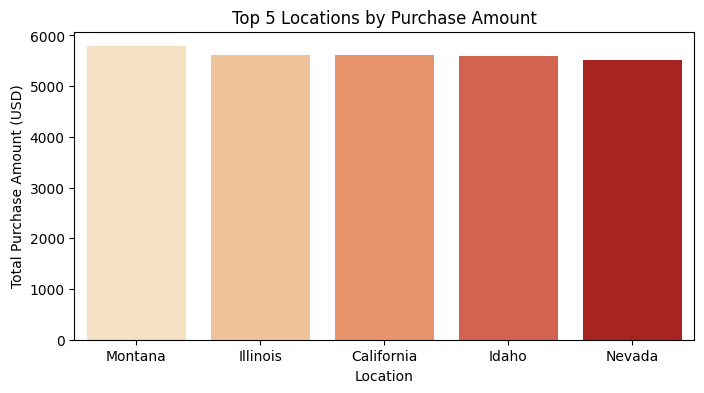

In [17]:
# 3. Make a plot of top 5 Location based on Purchase Amount

top_locations = df.groupby('Location')['Purchase Amount (USD)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Location', y='Purchase Amount (USD)', data=top_locations, palette="OrRd")

plt.xlabel('Location')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Top 5 Locations by Purchase Amount')
plt.show()

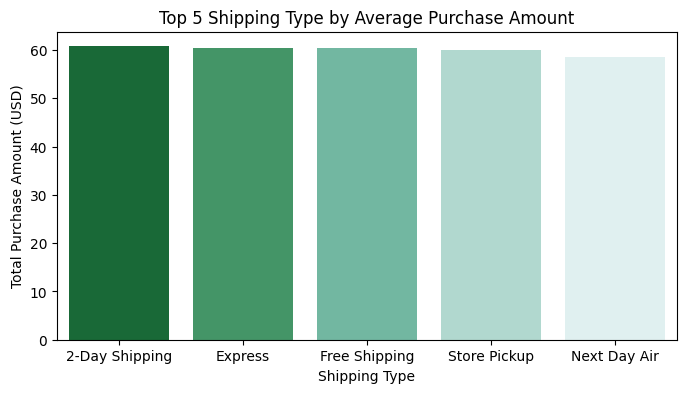

In [18]:
# 4. Make a plot of top 5 Location based on Average Purchase Amount

top_shipping_type = df.groupby('Shipping Type')['Purchase Amount (USD)'].mean().nlargest(5).reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Shipping Type', y='Purchase Amount (USD)', data=top_shipping_type, palette="BuGn_r")

plt.xlabel('Shipping Type')
plt.ylabel('Total Purchase Amount (USD)')
plt.title('Top 5 Shipping Type by Average Purchase Amount')
plt.show()

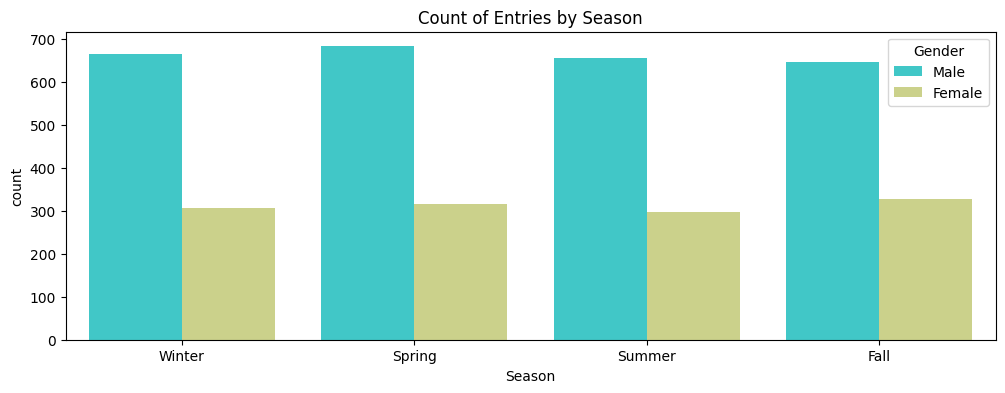

In [5]:
# Seasonal
plt.figure(figsize=(12,4))
sns.countplot(x='Season', hue='Gender', data=df, palette='rainbow')
plt.title('Count of Entries by Season')
plt.show()

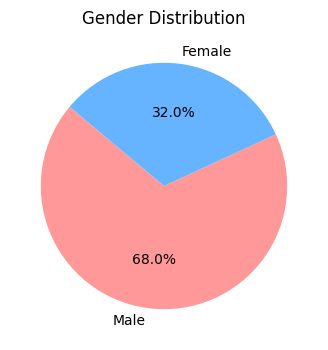

In [4]:
# Gender Distribution
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Gender Distribution')
plt.show()

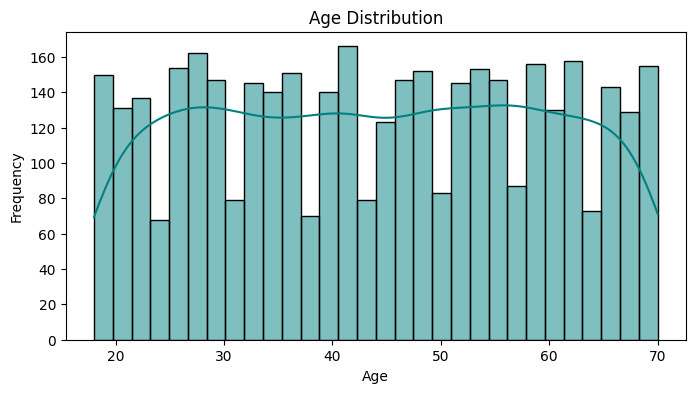

In [20]:
# 5. Plot histogram with 'Age' column

df['Age'] = df['Age'].replace([np.inf, -np.inf], np.nan)

plt.figure(figsize=(8, 4))
sns.histplot(df['Age'], kde=True, color='teal', bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

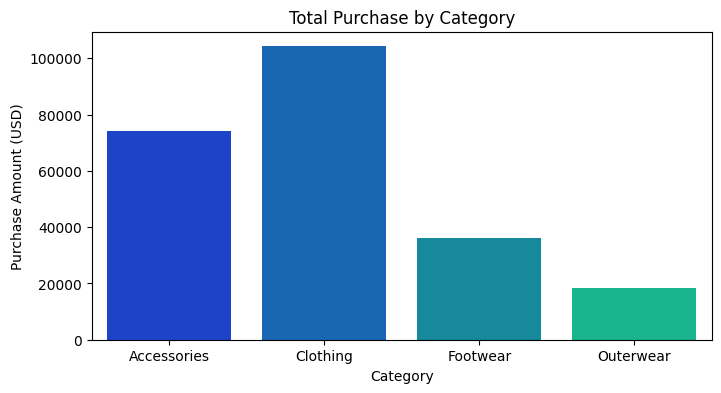

In [21]:
# 6. Make plot of total purchase amount by each category
category = df.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x = 'Category', y='Purchase Amount (USD)', data=category, palette='winter')
plt.title('Total Purchase by Category')
plt.show()

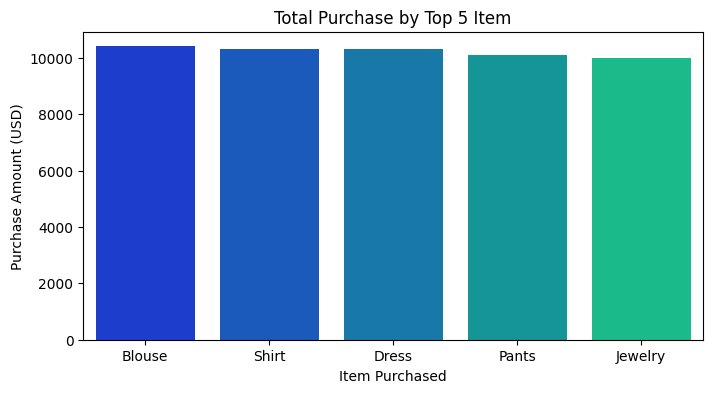

In [22]:
# 7. Make plot of consumer's favorite Top 5 item by total purchase amount

items = df.groupby('Item Purchased')['Purchase Amount (USD)'].sum().nlargest(5).reset_index()

plt.figure(figsize=(8,4))
sns.barplot(x = 'Item Purchased', y='Purchase Amount (USD)', data=items, palette='winter')
plt.title('Total Purchase by Top 5 Item')
plt.show()

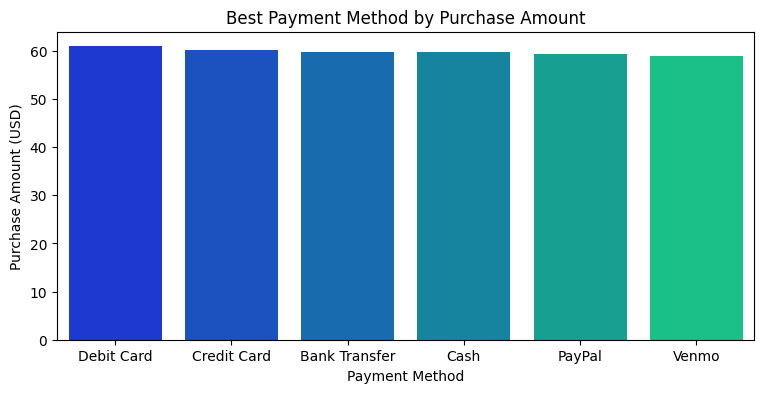

In [23]:
# 8. Make a plot of Consumer's favorite Payment Method by Purchase amount

payment_method = df.groupby('Payment Method')['Purchase Amount (USD)'].mean().reset_index()
payment_method = payment_method.sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(9,4))
sns.barplot(x = 'Payment Method', y='Purchase Amount (USD)', data=payment_method, palette='winter')
plt.title('Best Payment Method by Purchase Amount')
plt.show()

# Some Insights for better understand the consumers behavior

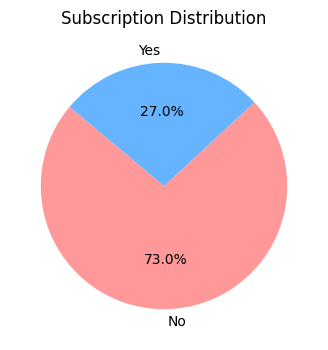

In [3]:
# Gender Distribution
subscription_count = df['Subscription Status'].value_counts()

plt.figure(figsize=(4, 4))
plt.pie(subscription_count, labels=subscription_count.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff'])
plt.title('Subscription Distribution')
plt.show()

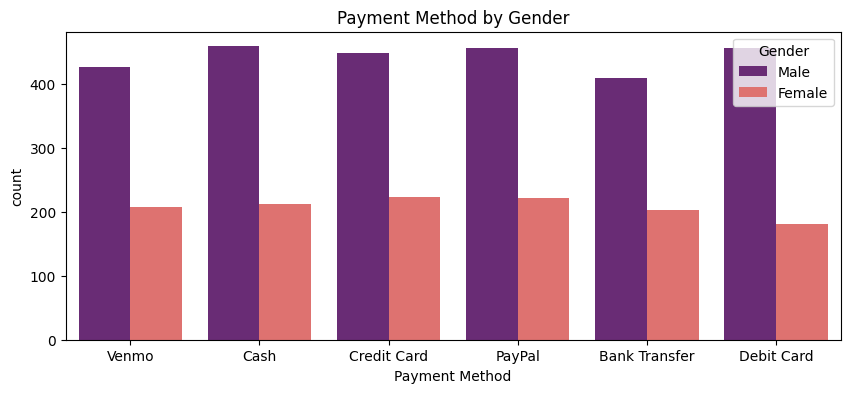

In [25]:
# Favorite Payment method by Gender 

plt.figure(figsize=(10, 4))
sns.countplot(x='Payment Method', hue='Gender', data=df, palette="magma")
plt.title('Payment Method by Gender')
plt.show()

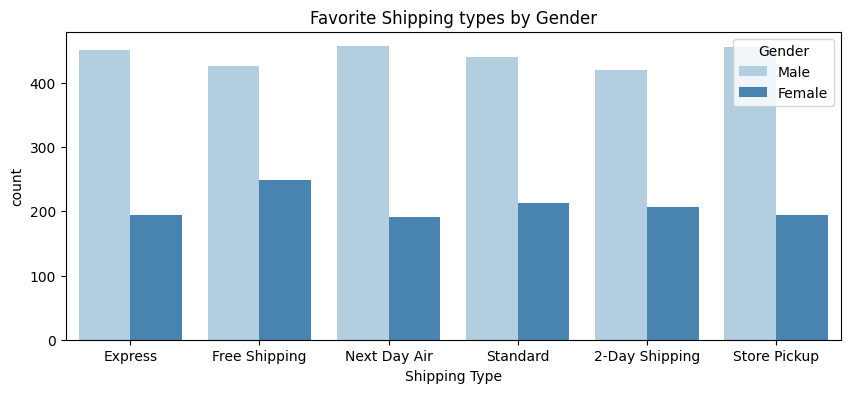

In [26]:
# Favorite shipping type by gender
plt.figure(figsize=(10, 4))
sns.countplot(x='Shipping Type', hue='Gender', data=df, palette='Blues')
plt.title('Favorite Shipping types by Gender')
plt.show()

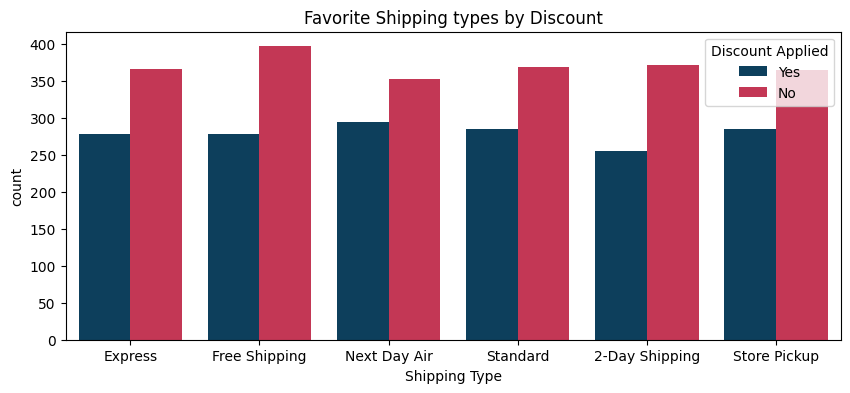

In [27]:
# Favorite Shipping types by Discount

plt.figure(figsize=(10, 4))
sns.countplot(x='Shipping Type', hue='Discount Applied', data=df, palette=['#004369', '#db1f48'])
plt.title('Favorite Shipping types by Discount')
plt.show()

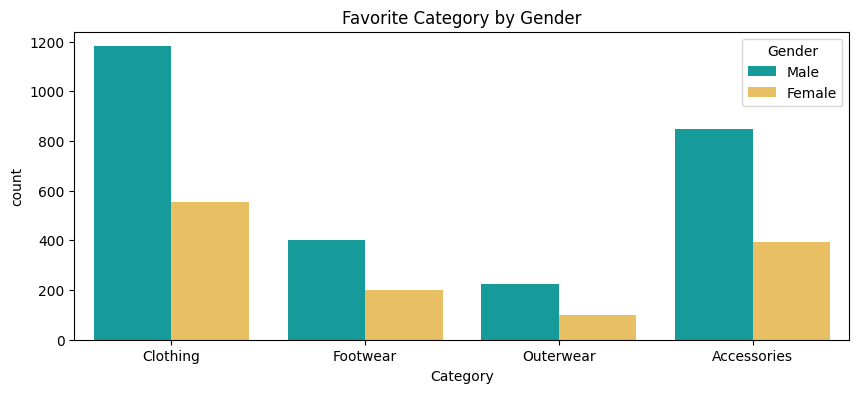

In [28]:
# Favorite items by gender

plt.figure(figsize=(10, 4))
sns.countplot(x='Category', hue='Gender', data=df, palette=['#00b1b0', '#fec84d'])
plt.title('Favorite Category by Gender')
plt.show()

# Level 3

* There are 3 types of datatypes or data in our dataset. (int, float, object)
* I will perform operations on categorical data and numerical data separately.

In [29]:
# 1. What factors contribute most to a consumer?

# for numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64'])
return_customer_group = numerical_columns.groupby(df['Subscription Status']).mean()
return_customer_group

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
Subscription Status,,,,,
No,2477.0,44.008430,59.865121,3.752722,25.080436
Yes,527.0,44.230769,59.491928,3.742450,26.084520


In [30]:
# for categorical columns

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

specific_columns = ['Gender', 'Category', 'Size', 'Season', 'Subscription Status','Shipping Type','Discount Applied',
                    'Promo Code Used', 'Payment Method', 'Frequency of Purchases']

for col in specific_columns:
    print(f"\n{col} distribution by 'Subscription Status':")
    print(pd.crosstab(df['Subscription Status'], df[col], normalize='index').apply(lambda r: r.round(3) * 100))


Gender distribution by 'Subscription Status':
Gender               Female   Male
Subscription Status               
No                     43.8   56.2
Yes                     0.0  100.0

Category distribution by 'Subscription Status':
Category             Accessories  Clothing  Footwear  Outerwear
Subscription Status                                            
No                          31.8      45.0      15.0        8.2
Yes                         31.7      43.4      16.2        8.6

Size distribution by 'Subscription Status':
Size                    L     M     S    XL
Subscription Status                        
No                   26.6  45.1  17.2  11.1
Yes                  28.0  44.8  16.5  10.6

Season distribution by 'Subscription Status':
Season               Fall  Spring  Summer  Winter
Subscription Status                              
No                   25.0    25.6    24.2    25.2
Yes                  25.1    25.6    25.2    24.1

Subscription Status distribution by 'Su

In [31]:
# These three columns contain many values. 
# I have performed operations on these three separately to beautify the output

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

specific_columns = ['Item Purchased', 'Location', 'Color']

for col in specific_columns:
    print(f"\n{col} distribution by 'Subscription Status':")
    print(pd.crosstab(df['Subscription Status'], df[col], normalize='index').apply(lambda r: r.round(3) * 100))


Item Purchased distribution by 'Subscription Status':
Item Purchased       Backpack  Belt  Blouse  Boots  Coat  Dress  Gloves  Handbag  Hat  Hoodie  Jacket  Jeans  Jewelry  Pants  Sandals  Scarf  Shirt  Shoes  Shorts  Skirt  Sneakers  Socks  Sunglasses  Sweater  T-shirt
Subscription Status                                                                                                                                                                                                     
No                        3.5   4.3     5.0    3.6   3.9    4.1     3.6      4.0  3.8     3.8     4.3    3.0      4.5    4.3      4.2    4.0    4.3    3.7     4.0    4.2       3.5    4.4         4.1      3.9      3.9
Yes                       4.1   3.7     2.7    4.0   4.8    4.6     3.6      3.7  4.5     4.1     3.8    3.7      4.1    4.7      3.8    4.0    4.4    4.3     4.2    3.7       4.2    3.2         4.1      4.9      3.3

Location distribution by 'Subscription Status':
Location             Alabama

# What I found

* 1. Total consumer 3900 


* 2. The average age of individuals in the dataset is 44  


* 3. Consumers purchased products from the "Clothing" category the most 


* 4. The list of consumer preferences includes blouses, shirts, dresses, pants and jewellery.


* 5. "PayPal" is the most preferred payment method. 


* 6. Average review score is 3.75


* 7. Out of 3900 customers only "249" customers gave 4 and 5 rating


* 8. On average, customers prefer "2-day shipping" 


* 9. Women on average buy products equally in all seasons. 


* 10. On the other hand, the buying rate of men's products is slightly higher during "Spring".

# Where to look

* Non-subscribers 78.1% did not apply discount while 21.9% used discount. 
  100% of subscribers have used the discount. 
  
  **** In other words, customers are more likely to subscribe if a discount is available. ****
 
 
 
* Promo code rates indicate that promo codes play a great role in attracting and converting customers. 

  ****  Discounts and promo codes increase the purchase rate of customers. ****

* Subscribers make frequent purchases, typically weekly. Nonsubscribers on the other hand purchase products every 3 months or quarterly. 
  
  **** New tactics can be adopted to get non-subscribers to buy products regularly. ****


* Why only 249 customers gave 4 or 5 rating should be looked into. 
  
  **** That's why we should analyze the behavioral analysis better and the company should be more aware of the product. 
  Then it is expected that good feedback from customers will increase. ****